In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

# Load Data

In [26]:
#this is just a placeholder, eventually I will convert proprocess_output to a .py and load it as a module
#And then this code will be relevant:
#data = preprocess_output.get_data()
%run preprocess_output.ipynb

In [27]:
# wow look at that data
data

,temperature,wind_direction,wind_speed,wind_gust,cloud_ceiling,visibility,Time,Day,cloud_BK,cloud_CL,...,Month_08,Month_09,Month_10,Month_11,Month_12,Season_autumn,Season_spring,Season_summer,Season_winter,# arrivals
KMEM_230315_0215,41.0,2.0,6.0,0.0,8.0,7.0,0.290285,0.594727,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
KMEM_230315_0230,41.0,2.0,6.0,0.0,8.0,7.0,0.321439,0.594727,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
KMEM_230315_0245,41.0,2.0,6.0,0.0,8.0,7.0,0.352250,0.594727,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
KMEM_230315_0300,41.0,2.0,6.0,0.0,8.0,7.0,0.382683,0.594727,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0
KMEM_230315_0315,39.0,3.0,5.0,0.0,8.0,7.0,0.412707,0.594727,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KMEM_230601_2345,86.0,13.0,6.0,0.0,8.0,7.0,0.032719,0.965740,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
KMEM_230601_0000,86.0,13.0,6.0,0.0,8.0,7.0,0.000000,0.965740,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
KMEM_230602_0015,85.0,12.0,6.0,0.0,8.0,7.0,0.032719,0.967938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
KMEM_230602_0045,85.0,12.0,6.0,0.0,8.0,7.0,0.098017,0.967938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


# Preprocess Data

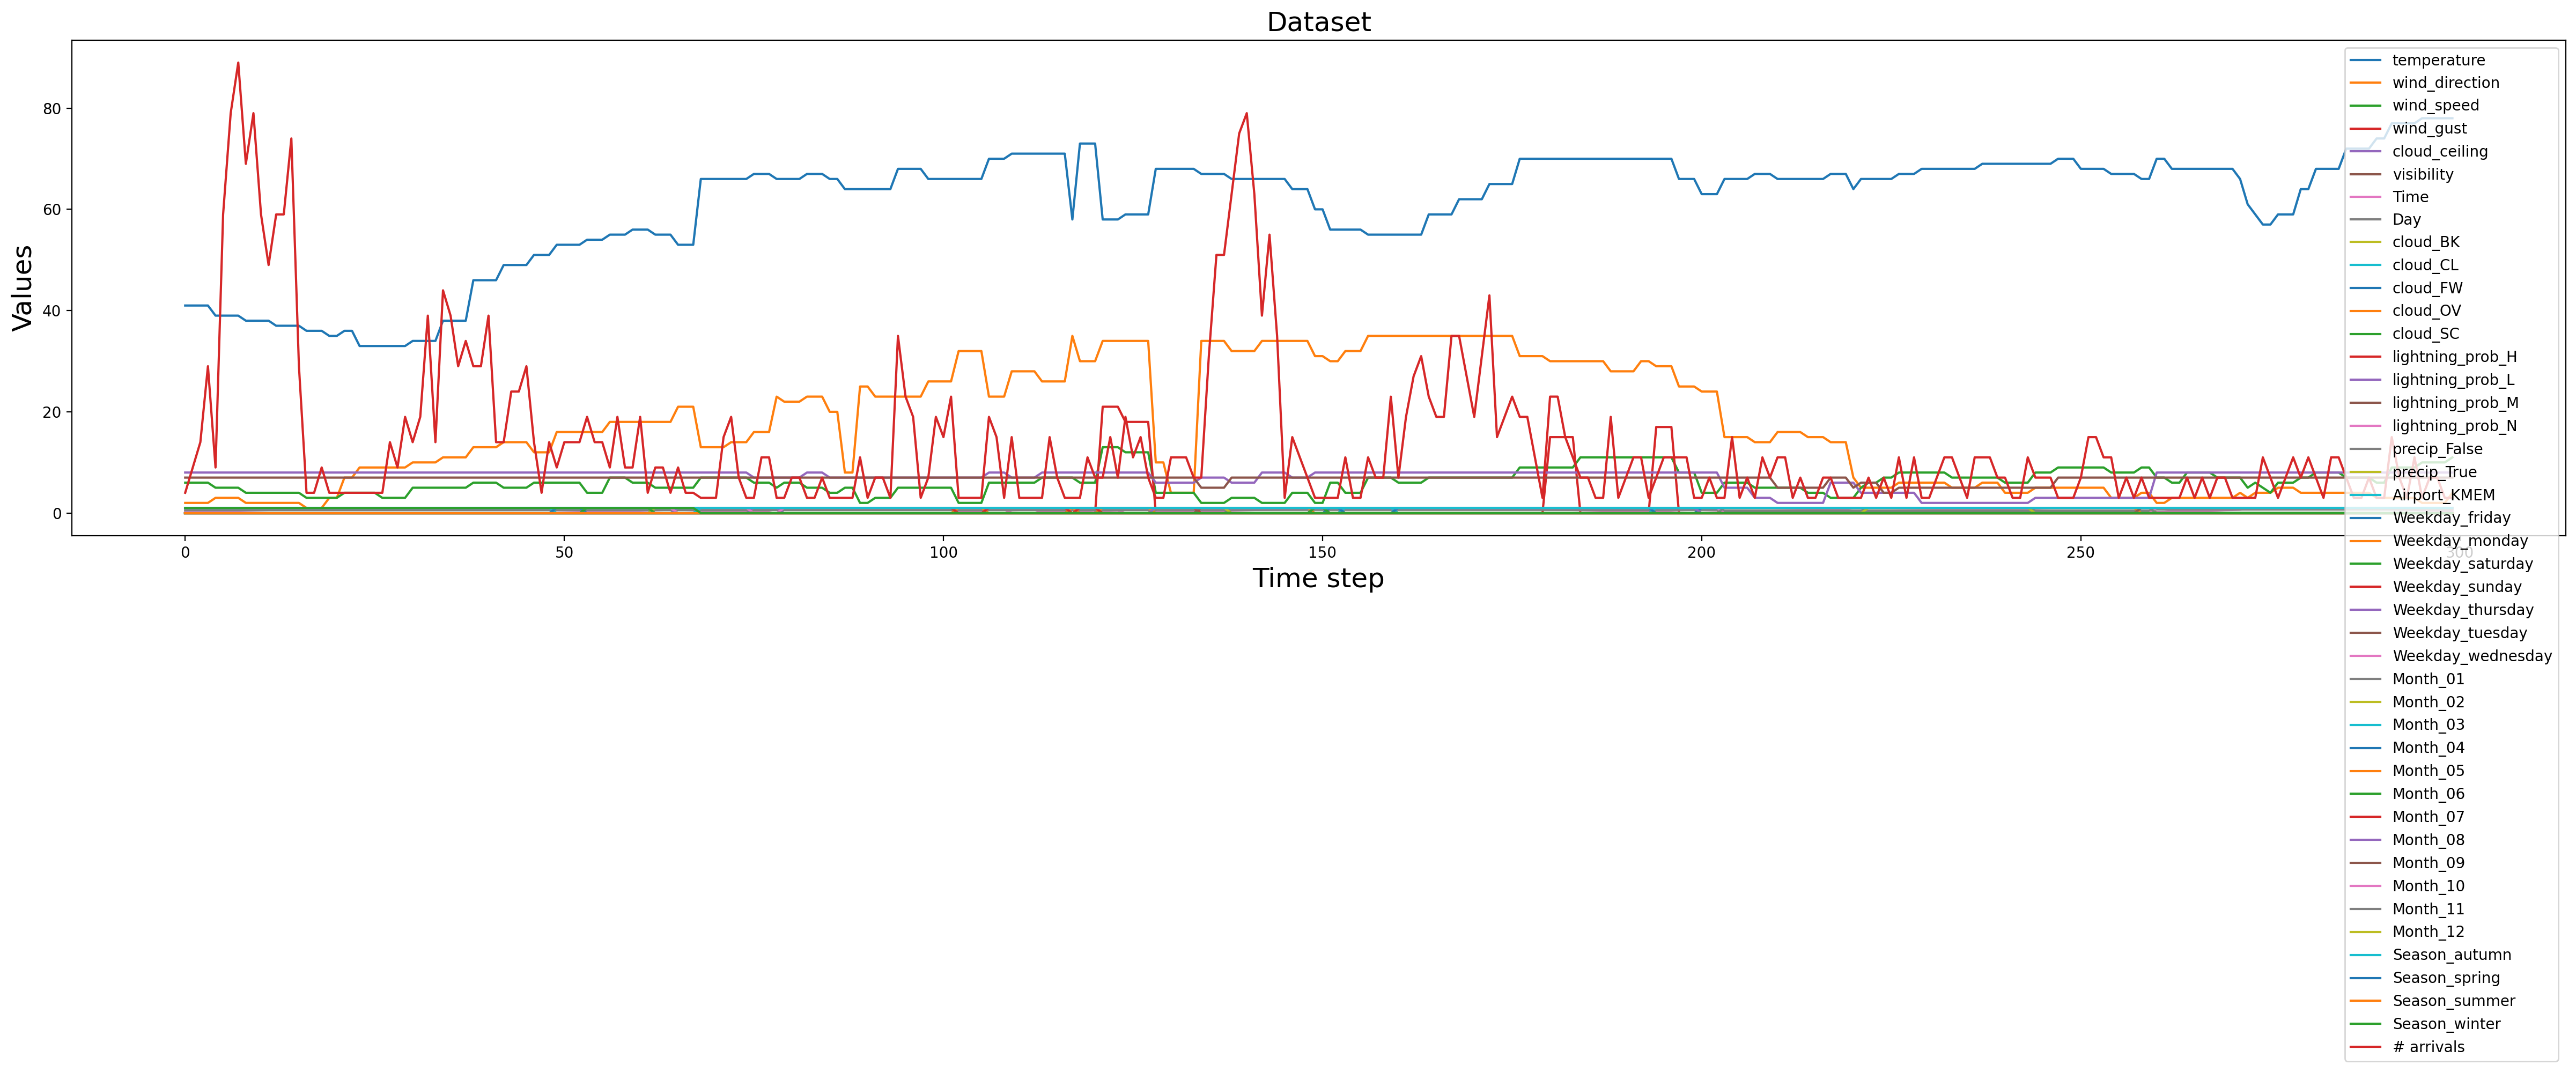

In [88]:
dataset = data.copy().iloc[:int(len(data) * 0.8)]
plt.figure(figsize=(30, 6))
for col in dataset.columns:
    plt.plot(dataset[col].values[:300], label = col)
plt.legend(loc='upper right')
plt.title("Dataset" ,  fontsize=18)
plt.xlabel('Time step' ,  fontsize=18)
plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [89]:

configed_features = []
scaler = MinMaxScaler(feature_range=(0, 1))
for col in dataset.columns:
    # Step 1 : convert to [rows, columns] structure
    x = dataset[col].values
    x_reshaped = x.reshape((len(x), 1))
    print (col , x_reshaped.shape) 
    # Step 2 : normalization 
    x_scaled = scaler.fit_transform(x_reshaped)
    configed_features.append(x_scaled)

# Step 3 : horizontally stack columns
dataset_stacked = hstack(configed_features)
print ("dataset_stacked.shape" , dataset_stacked.shape)

temperature (14290, 1)
wind_direction (14290, 1)
wind_speed (14290, 1)
wind_gust (14290, 1)
cloud_ceiling (14290, 1)
visibility (14290, 1)
Time (14290, 1)
Day (14290, 1)
cloud_BK (14290, 1)
cloud_CL (14290, 1)
cloud_FW (14290, 1)
cloud_OV (14290, 1)
cloud_SC (14290, 1)
lightning_prob_H (14290, 1)
lightning_prob_L (14290, 1)
lightning_prob_M (14290, 1)
lightning_prob_N (14290, 1)
precip_False (14290, 1)
precip_True (14290, 1)
Airport_KMEM (14290, 1)
Weekday_friday (14290, 1)
Weekday_monday (14290, 1)
Weekday_saturday (14290, 1)
Weekday_sunday (14290, 1)
Weekday_thursday (14290, 1)
Weekday_tuesday (14290, 1)
Weekday_wednesday (14290, 1)
Month_01 (14290, 1)
Month_02 (14290, 1)
Month_03 (14290, 1)
Month_04 (14290, 1)
Month_05 (14290, 1)
Month_06 (14290, 1)
Month_07 (14290, 1)
Month_08 (14290, 1)
Month_09 (14290, 1)
Month_10 (14290, 1)
Month_11 (14290, 1)
Month_12 (14290, 1)
Season_autumn (14290, 1)
Season_spring (14290, 1)
Season_summer (14290, 1)
Season_winter (14290, 1)
# arrivals (14290

In [90]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequences)):
  # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out-1
  # check if we are beyond the dataset
  if out_end_ix > len(sequences):
   break
  # gather input and output parts of the pattern
  seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)
# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 60 , 30
# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)
print ("X.shape" , X.shape) 
print ("y.shape" , y.shape)

X.shape (14202, 60, 43)
y.shape (14202, 30)


In [91]:
split_point = int(len(X)*.9)

train_X, valid_X = X[:split_point, :], X[split_point:, :]
train_y, valid_y = y[:split_point, :], y[split_point:, :]

# Build the Model

In [92]:
n_features = X.shape[2]

In [93]:
#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.0001)
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mse'])

/projectnb/cs640grp/students/samwu/Rnn-Forecast/.venv/lib64/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
# Fit network
history = model.fit(train_X , train_y , epochs=60 , steps_per_epoch=25 , verbose=1 ,validation_data=(valid_X, valid_y) ,shuffle=False)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2/60


/usr/lib64/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 10/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 

# Evaluate Model

In [115]:
def prep_data(dataset_x, dataset_y , start , end , last):
    # read test data
    final_x = []
    for col in dataset_x:
        x1_test = dataset_x[col].values
        x1_test = x1_test.reshape((len(x1_test), 1))
        x1_test_scaled = scaler.fit_transform(x1_test)
        final_x.append(x1_test_scaled)
    y_test = dataset_y.values # no need to scale
    y_test = y_test.reshape((len(y_test), 1))

    #prepare test data X
    dataset_test = hstack(final_x)
    dataset_test_X = dataset_test[start:end, :]
    print("dataset_test_X :",dataset_test_X.shape)
    test_X_new = dataset_test_X.reshape(1,dataset_test_X.shape[0],dataset_test_X.shape[1])
    print("test_X_new :",test_X_new.shape)
#prepare past and groundtruth
    past_data = y_test[:end , :]
    dataset_test_y = y_test[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)
    print("dataset_test_y :",dataset_test_y.shape)
    print("past_data :",past_data.shape)
#predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]
    print("y_pred :",y_pred.shape)
    print("y_pred_inv :",y_pred_inv.shape)
    
    return y_pred_inv , dataset_test_y , past_data

In [116]:
# Test Data Batch 1 , Test Data Batch 2 , Test Data Batch 3
dataset_test = data.copy().iloc[int(len(data) * 0.8):]
dataset_x = dataset_test.iloc[:, :-1]
dataset_y = dataset_test.iloc[:, -1:]
start = 60
end = start + n_steps_in 
last = end + n_steps_out 
y_pred_inv , dataset_test_y , past_data = prep_data(dataset_x, dataset_y, start , end , last)

dataset_test_X : (60, 43)
test_X_new : (1, 60, 43)
dataset_test_y : (30, 1)
past_data : (120, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
y_pred : (1, 30)
y_pred_inv : (30,)


In [117]:
# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('')
    print('')
evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end)

Test Data from 60 to 120
Mean Absolute Error: 4.06
Root Mean Square Error: 5.34




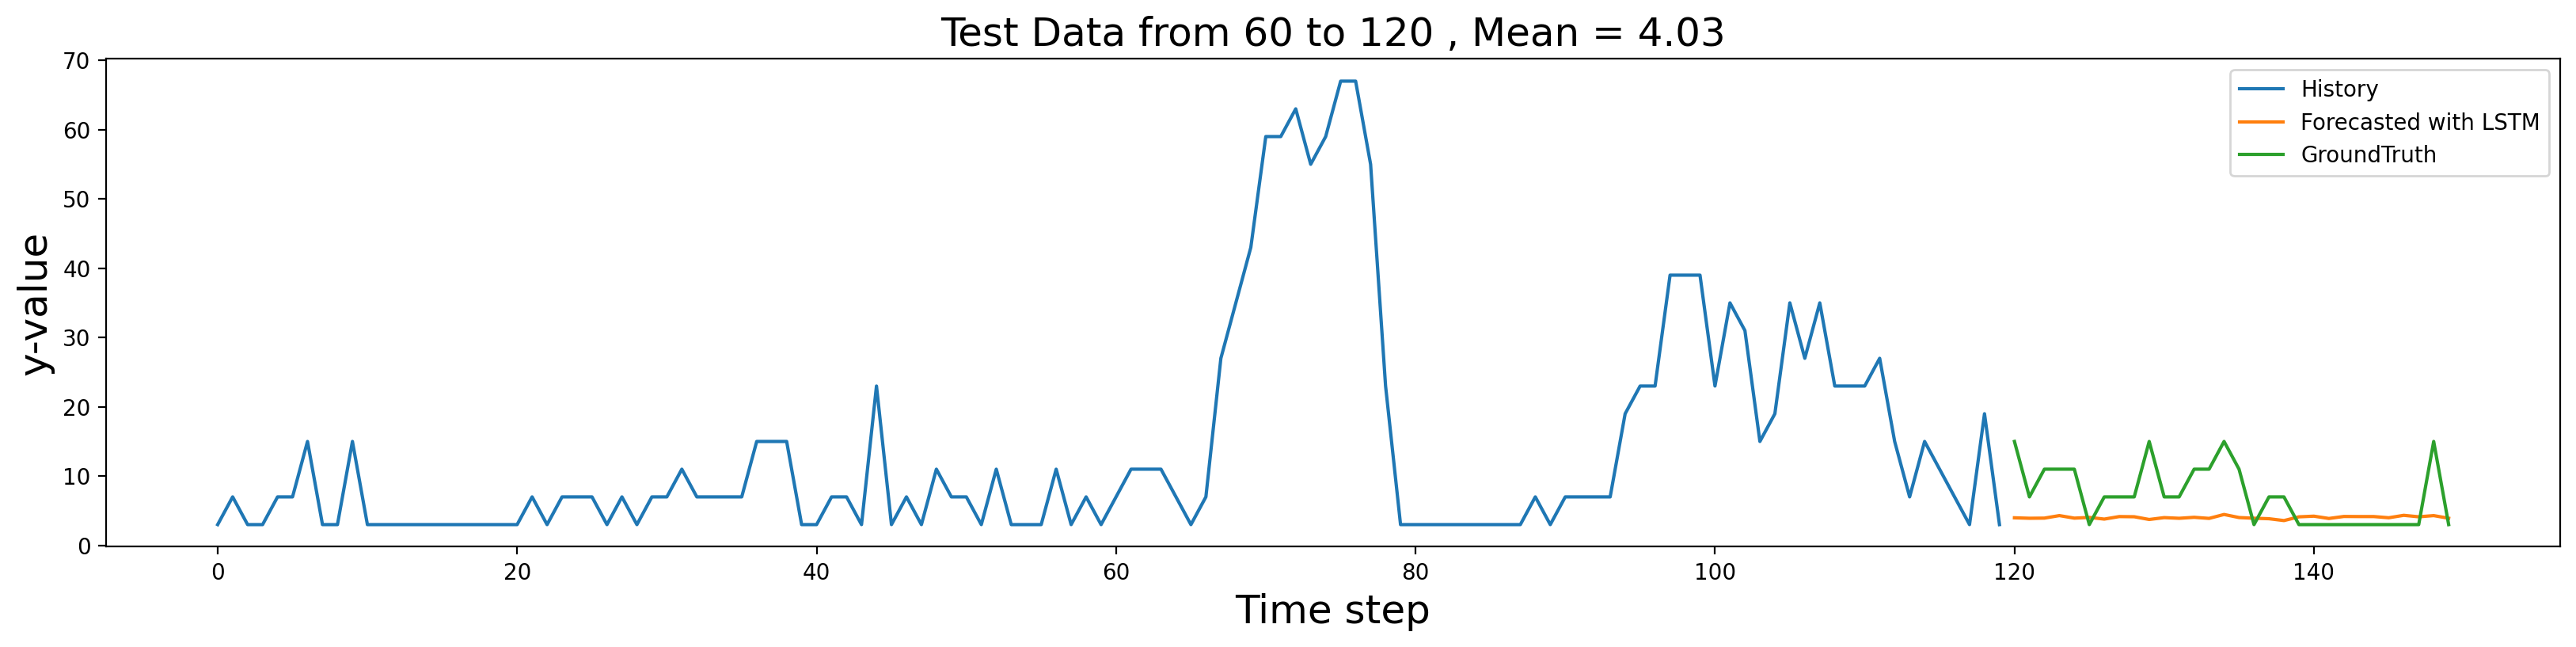

In [118]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)
plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)

dataset_test_X : (60, 43)
test_X_new : (1, 60, 43)
dataset_test_y : (30, 1)
past_data : (180, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
y_pred : (1, 30)
y_pred_inv : (30,)
Test Data from 120 to 180
Mean Absolute Error: 20.83
Root Mean Square Error: 31.07


dataset_test_X : (60, 43)
test_X_new : (1, 60, 43)
dataset_test_y : (30, 1)
past_data : (240, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
y_pred : (1, 30)
y_pred_inv : (30,)
Test Data from 180 to 240
Mean Absolute Error: 22.70
Root Mean Square Error: 32.89




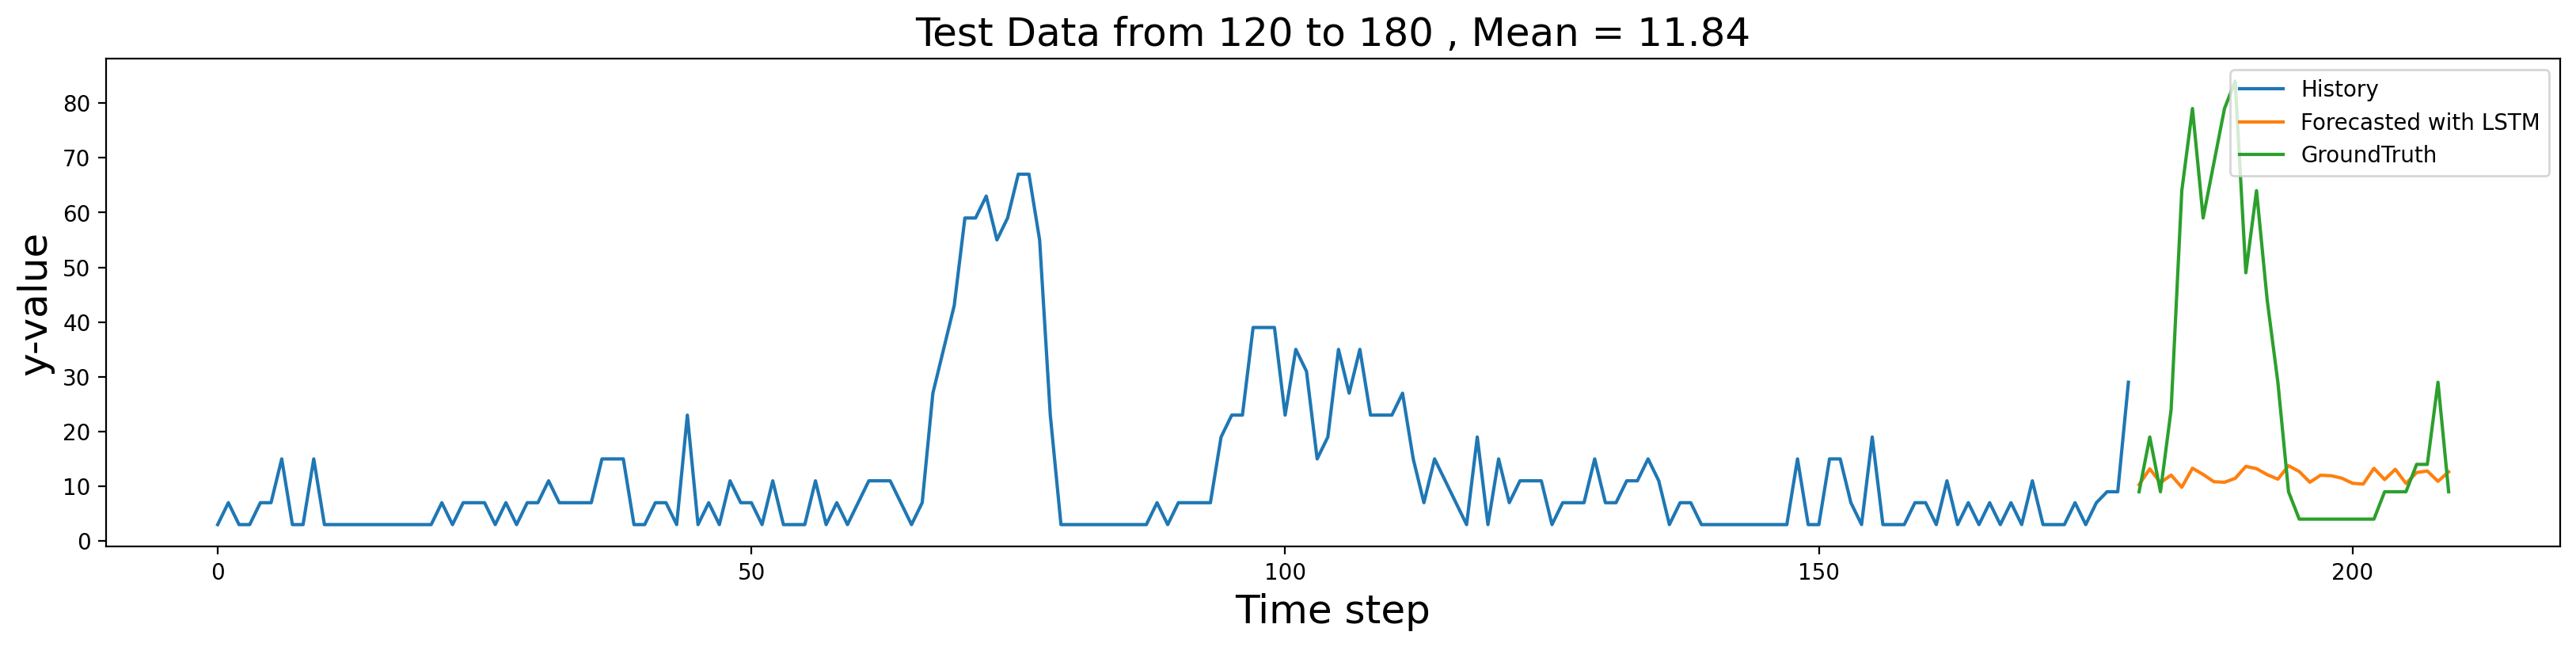

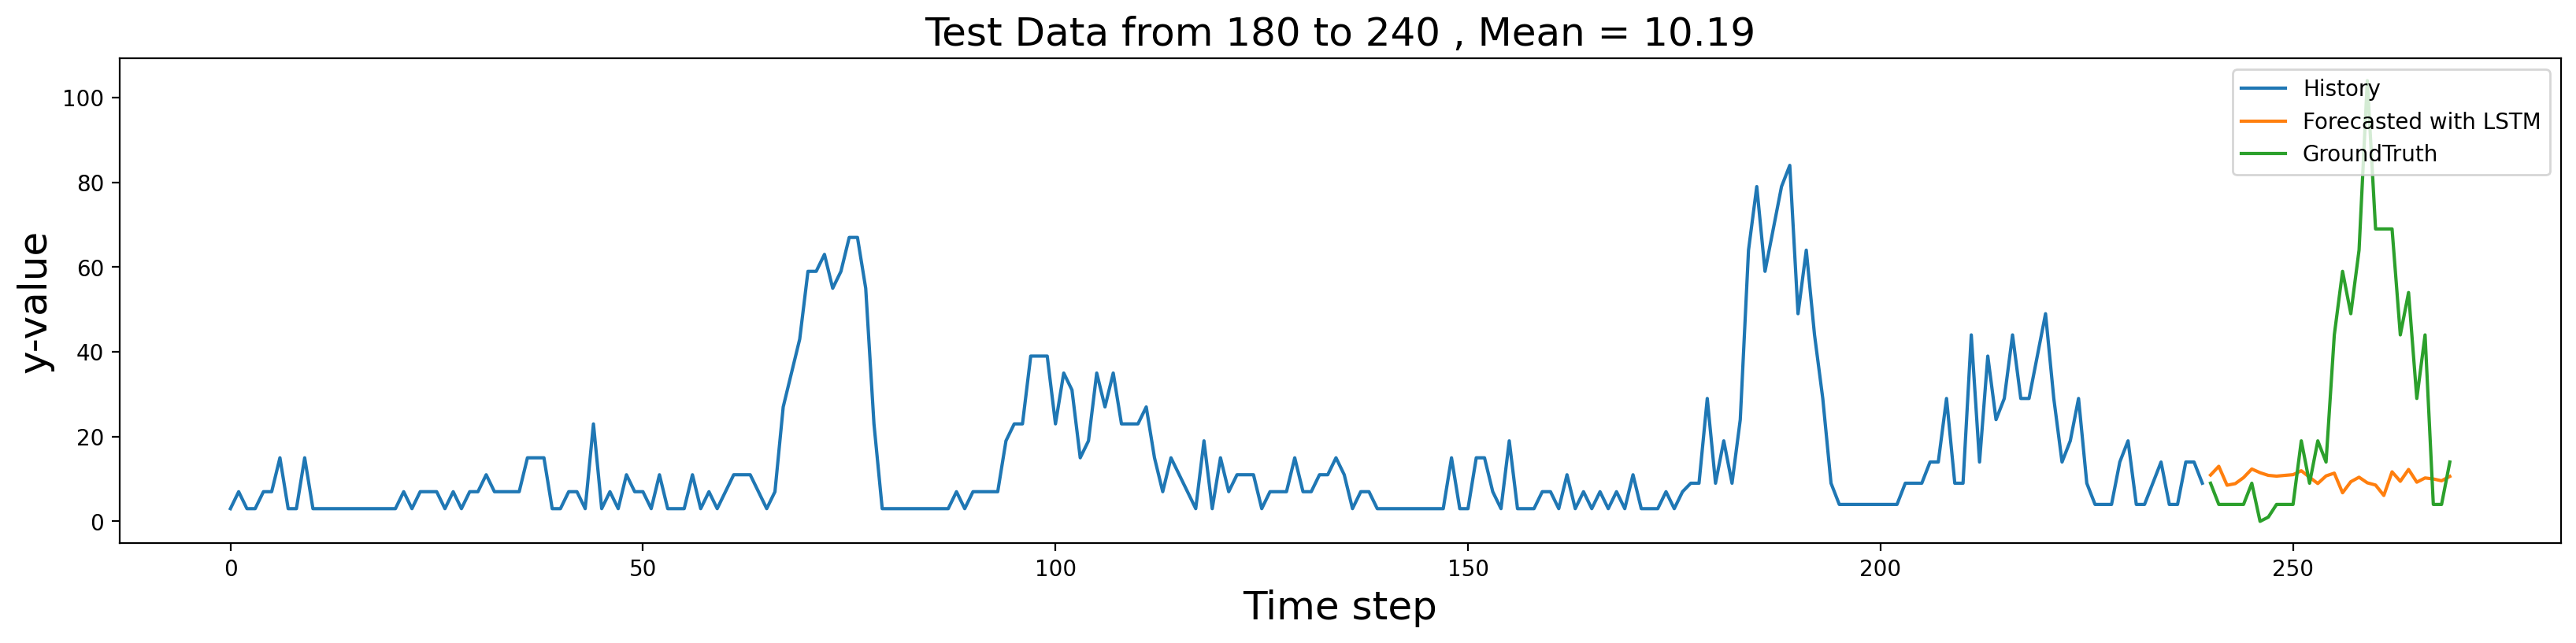

In [120]:
for i in range(120,240,60):
    start = i
    end = start + n_steps_in 
    last = end + n_steps_out 
    y_pred_inv , dataset_test_y , past_data = prep_data(dataset_x, dataset_y, start , end , last)
    evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end) 
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)